In [296]:
import pandas as pd 
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [297]:
df=pd.read_csv("spam_ham_dataset.csv")


In [298]:
df.sample(5)

,Unnamed: 0,label,text,label_num
1027,470,ham,Subject: lst rev mar . 2000 josey ranch nom\r\...,0
2981,3110,ham,"Subject: pleo 0004 2000\r\ndaren ,\r\nwhen i l...",0
900,1806,ham,"Subject: hello again\r\nhi darren ,\r\ndid you...",0
2231,2384,ham,Subject: sale of hpl\r\nto all :\r\nthe propos...,0
2924,3533,ham,Subject: re : path manager rewrite / optimizat...,0


In [299]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [300]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [301]:
df.duplicated().sum()
df.drop(columns=['Unnamed: 0'],inplace=True)
df['text'] = df['text'].str.replace('Subject:',"")

In [302]:
df.head()

,label,text,label_num
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0
2,ham,"neon retreat\r\nho ho ho , we ' re around to ...",0
3,spam,"photoshop , windows , office . cheap . main t...",1
4,ham,re : indian springs\r\nthis deal is to book t...,0


In [303]:
df.rename(columns={'label_num': 'label_value'}, inplace=True)

In [304]:
## EDA

In [305]:
df.head()

,label,text,label_value
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0
2,ham,"neon retreat\r\nho ho ho , we ' re around to ...",0
3,spam,"photoshop , windows , office . cheap . main t...",1
4,ham,re : indian springs\r\nthis deal is to book t...,0


In [306]:
df["label"].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [307]:
import matplotlib.pyplot as plt


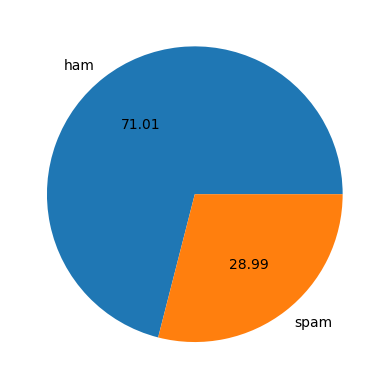

In [308]:
plt.pie(df["label"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [309]:
import nltk

In [310]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Ch
[nltk_data]     Abdullah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [311]:
df["Characters"]=df["text"].apply(len)

In [312]:
df.head()

,label,text,label_value,Characters
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0,319
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0,89
2,ham,"neon retreat\r\nho ho ho , we ' re around to ...",0,2516
3,spam,"photoshop , windows , office . cheap . main t...",1,406
4,ham,re : indian springs\r\nthis deal is to book t...,0,328


In [313]:
df["Words"]=df["text"].apply(lambda x:len((nltk.word_tokenize(x))))

In [314]:
df.head()

,label,text,label_value,Characters,Words
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0,319,66
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0,89,22
2,ham,"neon retreat\r\nho ho ho , we ' re around to ...",0,2516,549
3,spam,"photoshop , windows , office . cheap . main t...",1,406,47
4,ham,re : indian springs\r\nthis deal is to book t...,0,328,69


In [315]:
df["Sentence"]=df["text"].apply(lambda x:len((nltk.sent_tokenize(x))))

In [316]:
df.head()


,label,text,label_value,Characters,Words,Sentence
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0,319,66,3
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0,89,22,3
2,ham,"neon retreat\r\nho ho ho , we ' re around to ...",0,2516,549,24
3,spam,"photoshop , windows , office . cheap . main t...",1,406,47,3
4,ham,re : indian springs\r\nthis deal is to book t...,0,328,69,3


In [317]:
df[["Characters","Words","Sentence"]].describe()

,Characters,Words,Sentence
count,5171.000000,5171.000000,5171.000000
mean,1040.391994,227.181009,13.118159
std,1528.513435,336.487397,27.543055
min,3.000000,0.000000,0.000000
25%,236.000000,50.000000,4.000000
50%,532.000000,120.000000,7.000000
75%,1229.000000,281.500000,15.000000
max,32250.000000,8861.000000,1204.000000


In [318]:
df[df["label"]=="ham"][["Characters","Words","Sentence"]].describe()

,Characters,Words,Sentence
count,3672.000000,3672.000000,3672.000000
mean,969.008170,224.239107,11.440904
std,1382.827493,332.179661,24.892442
min,10.000000,1.000000,1.000000
25%,223.750000,49.000000,3.000000
50%,522.000000,122.000000,6.000000
75%,1219.250000,292.000000,13.000000
max,32250.000000,8861.000000,1204.000000


In [319]:
df[df["label"]=="spam"][["Characters","Words","Sentence"]].describe()

,Characters,Words,Sentence
count,1499.000000,1499.000000,1499.000000
mean,1215.256171,234.387592,17.226818
std,1825.986210,346.821249,32.801491
min,3.000000,0.000000,0.000000
25%,275.000000,53.000000,4.000000
50%,568.000000,114.000000,9.000000
75%,1245.500000,242.000000,18.500000
max,22065.000000,3961.000000,693.000000


In [320]:
import seaborn as sns

<Axes: xlabel='Characters', ylabel='Count'>

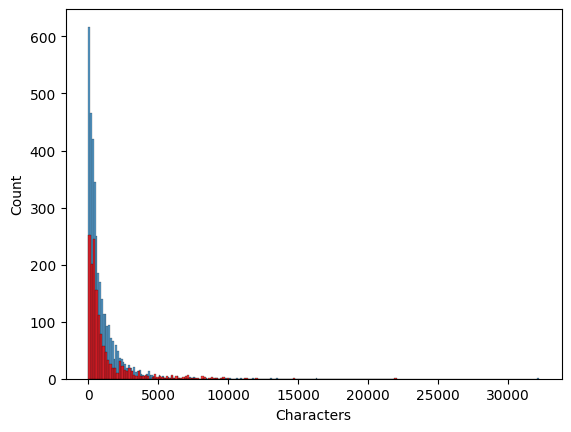

In [321]:

sns.histplot(df[df["label"]=="ham"]["Characters"])
sns.histplot(df[df["label"]=="spam"]["Characters"],color="red")

In [322]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer




def texttransform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
           y.append(i)
    

    text=y[:]
    y.clear()

    ps=PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [323]:

df["Transform_Tex"]=df["text"].apply(texttransform)

In [324]:
df.head()

,label,text,label_value,Characters,Words,Sentence,Transform_Tex
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0,319,66,3,enron methanol meter 988291 follow note gave m...
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0,89,22,3,hpl nom januari 9 2001 see attach file hplnol ...
2,ham,"neon retreat\r\nho ho ho , we ' re around to ...",0,2516,549,24,neon retreat ho ho ho around wonder time year ...
3,spam,"photoshop , windows , office . cheap . main t...",1,406,47,3,photoshop window offic cheap main trend abas d...
4,ham,re : indian springs\r\nthis deal is to book t...,0,328,69,3,indian spring deal book teco pvr revenu unders...


In [325]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [326]:
spam_wc = wc.generate(df[df['label'] == "spam"]['Transform_Tex'].str.cat(sep=" "))

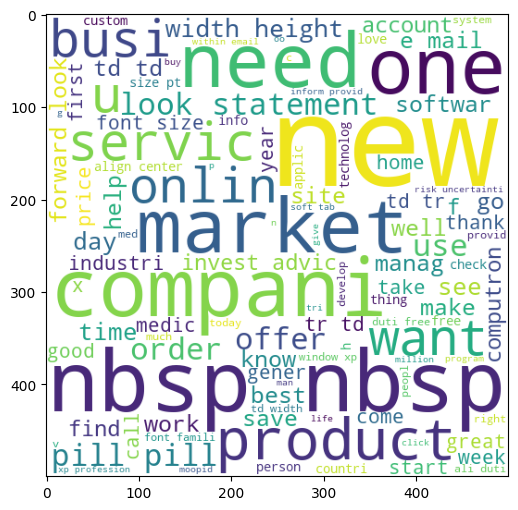

In [327]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [328]:
spam_wc = wc.generate(df[df['label'] == "ham"]['Transform_Tex'].str.cat(sep=" "))

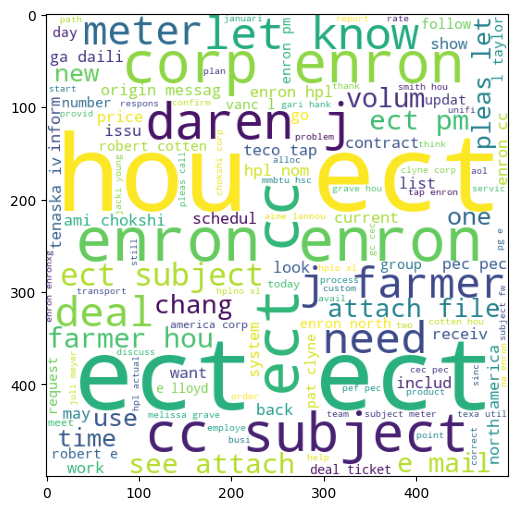

In [329]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [330]:
df.head()

,label,text,label_value,Characters,Words,Sentence,Transform_Tex
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,0,319,66,3,enron methanol meter 988291 follow note gave m...
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",0,89,22,3,hpl nom januari 9 2001 see attach file hplnol ...
2,ham,"neon retreat\r\nho ho ho , we ' re around to ...",0,2516,549,24,neon retreat ho ho ho around wonder time year ...
3,spam,"photoshop , windows , office . cheap . main t...",1,406,47,3,photoshop window offic cheap main trend abas d...
4,ham,re : indian springs\r\nthis deal is to book t...,0,328,69,3,indian spring deal book teco pvr revenu unders...


In [331]:
spam_corpus = []
for msg in df[df['label'] == "spam"]['Transform_Tex'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [332]:
len(spam_corpus)

195953

In [333]:
from collections import Counter
Counter(spam_corpus).most_common(30)


[('3', 1239),
 ('com', 992),
 ('http', 984),
 ('compani', 918),
 ('2', 858),
 ('price', 732),
 ('1', 720),
 ('0', 698),
 ('e', 638),
 ('www', 587),
 ('00', 585),
 ('inform', 557),
 ('get', 555),
 ('font', 515),
 ('email', 513),
 ('5', 510),
 ('pleas', 506),
 ('td', 504),
 ('secur', 499),
 ('statement', 497),
 ('4', 494),
 ('invest', 473),
 ('us', 469),
 ('stock', 467),
 ('product', 463),
 ('7', 457),
 ('time', 449),
 ('new', 432),
 ('may', 421),
 ('nbsp', 418)]

In [334]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [335]:
X = tfidf.fit_transform(df['Transform_Tex']).toarray()


In [336]:
X.shape

(5171, 3000)

In [337]:
y = df['label_value'].values

In [338]:
from sklearn.model_selection import train_test_split

In [339]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [340]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [341]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [342]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9623188405797102
[[717  29]
 [ 10 279]]
0.9058441558441559


In [343]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9458937198067633
[[703  43]
 [ 13 276]]
0.8652037617554859


In [344]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9178743961352657
[[689  57]
 [ 28 261]]
0.8207547169811321


In [345]:
# tfidf --> MNB

In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [347]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [348]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [349]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [350]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9806763285024155, np.float64(0.9559322033898305))

In [351]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9806763285024155
Precision -  0.9559322033898305
For  KN
Accuracy -  0.6222222222222222
Precision -  0.425
For  NB
Accuracy -  0.9458937198067633
Precision -  0.8652037617554859
For  DT
Accuracy -  0.8415458937198068
Precision -  0.6463700234192038
For  LR
Accuracy -  0.9719806763285024
Precision -  0.9304635761589404
For  RF
Accuracy -  0.9777777777777777
Precision -  0.9463087248322147


C:\Users\Ch Abdullah\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9623188405797102
Precision -  0.9111842105263158
For  BgC
Accuracy -  0.9545893719806763
Precision -  0.9033333333333333
For  ETC
Accuracy -  0.9816425120772947
Precision -  0.956081081081081
For  GBDT
Accuracy -  0.9565217391304348
Precision -  0.8910256410256411
For  xgb
Accuracy -  0.9719806763285024
Precision -  0.9248366013071896


In [352]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [353]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.981643,0.956081
0,SVC,0.980676,0.955932
5,RF,0.977778,0.946309
4,LR,0.971981,0.930464
10,xgb,0.971981,0.924837
6,AdaBoost,0.962319,0.911184
7,BgC,0.954589,0.903333
9,GBDT,0.956522,0.891026
2,NB,0.945894,0.865204
3,DT,0.841546,0.646370


In [354]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [355]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.981643
1,SVC,Accuracy,0.980676
2,RF,Accuracy,0.977778
3,LR,Accuracy,0.971981
4,xgb,Accuracy,0.971981
5,AdaBoost,Accuracy,0.962319
6,BgC,Accuracy,0.954589
7,GBDT,Accuracy,0.956522
8,NB,Accuracy,0.945894
9,DT,Accuracy,0.841546


In [356]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [357]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [358]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [359]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [360]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [361]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [362]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.981643,0.956081,0.981643,0.956081,0.981643,0.956081,0.981643,0.956081
1,SVC,0.980676,0.955932,0.980676,0.955932,0.980676,0.955932,0.980676,0.955932
2,RF,0.977778,0.946309,0.977778,0.946309,0.977778,0.946309,0.977778,0.946309
3,LR,0.971981,0.930464,0.971981,0.930464,0.971981,0.930464,0.971981,0.930464
4,xgb,0.971981,0.924837,0.971981,0.924837,0.971981,0.924837,0.971981,0.924837
5,AdaBoost,0.962319,0.911184,0.962319,0.911184,0.962319,0.911184,0.962319,0.911184
6,BgC,0.954589,0.903333,0.954589,0.903333,0.954589,0.903333,0.954589,0.903333
7,GBDT,0.956522,0.891026,0.956522,0.891026,0.956522,0.891026,0.956522,0.891026
8,NB,0.945894,0.865204,0.945894,0.865204,0.945894,0.865204,0.945894,0.865204
9,DT,0.841546,0.646370,0.841546,0.646370,0.841546,0.646370,0.841546,0.646370


In [363]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [364]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [365]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [366]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845410628019323
Precision 0.9534883720930233
